In [ ]:
%pip install scikit-learn nltk
%pip install seaborn

In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [11]:
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

etiquetes = [opinion[1] for opinion in documents]

all_words = [w.lower() for w in movie_reviews.words()]
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:3000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words)
    return features

featuresets = [(document_features(d), c) for (d,c) in documents]

In [14]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Descargar recursos adicionales de NLTK
nltk.download('stopwords')

# Obtener lista de palabras vacías y definir signos de puntuación
stop_words = set(stopwords.words('english'))
punctuations = set(punctuation)

# Función para extraer características del documento eliminando palabras vacías y signos de puntuación
def document_features(document):
    # Tokenizar el documento y eliminar signos de puntuación
    document_words = [word.lower() for word in nltk.word_tokenize(document) if word.lower() not in punctuations]
    
    # Eliminar palabras vacías
    document_words = [word for word in document_words if word.lower() not in stop_words]
    
    # Crear conjunto de características
    features = {}
    for word in word_features:
        features[word] = (word in document_words)
    return features


documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

etiquetes = [opinion[1] for opinion in documents]

all_words = [w.lower() for w in movie_reviews.words()]
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:3000]

featuresets = [(document_features(d), c) for (d,c) in documents]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Obtener críticas
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# Inicializa el CountVectorizer
vectorizer = CountVectorizer(min_df=10)

# Transforma las críticas en vectores de características
X = vectorizer.fit_transform(reviews)

In [6]:
print(X.shape)

(2000, 8187)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, etiquetes, test_size=0.2, random_state=42)

In [19]:
from sklearn.naive_bayes import MultinomialNB

# Inicialitza el classificador MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

from sklearn.svm import SVC

#Inicialitza el classificador svm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression

#Inicialitza el classificador logistic regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

#Inicialitza el classificador
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Naive Bayes
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5)
print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Mean Naive Bayes Cross-Validation Score:", nb_cv_scores.mean())

# Validación cruzada para SVM
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("Mean SVM Cross-Validation Score:", svm_cv_scores.mean())

# Validación cruzada para Regresión Logística
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Mean Logistic Regression Cross-Validation Score:", logistic_cv_scores.mean())

# Validación cruzada para Árboles de Decisión
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)
print("Decision Tree Cross-Validation Scores:", decision_tree_cv_scores)
print("Mean Decision Tree Cross-Validation Score:", decision_tree_cv_scores.mean())


Naive Bayes Cross-Validation Scores: [0.790625 0.85625  0.79375  0.803125 0.79375 ]
Mean Naive Bayes Cross-Validation Score: 0.8074999999999999
SVM Cross-Validation Scores: [0.8125   0.8375   0.796875 0.828125 0.79375 ]
Mean SVM Cross-Validation Score: 0.81375
Logistic Regression Cross-Validation Scores: [0.8375   0.859375 0.803125 0.834375 0.821875]
Mean Logistic Regression Cross-Validation Score: 0.83125
Decision Tree Cross-Validation Scores: [0.621875 0.678125 0.59375  0.640625 0.68125 ]
Mean Decision Tree Cross-Validation Score: 0.643125


In [18]:
import pandas as pd

# Realiza predicciones en el conjunto de prueba
y_pred_mnb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calcular accuracies
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Crear el dataframe
data = {
    'Model': ['Multinomial Naive Bayes', 'SVM', 'Regresió Logistica', 'Arbre de Decisió'],
    'Accuracy': [accuracy_mnb, accuracy_svm, accuracy_logistic, accuracy_decision_tree]
}

taula_accuracy = pd.DataFrame(data)

# Mostrar la tabla
print(taula_accuracy)

                     Model  Accuracy
0  Multinomial Naive Bayes    0.8225
1                      SVM    0.8175
2       Regresió Logistica    0.8250
3         Arbre de Decisió    0.6525


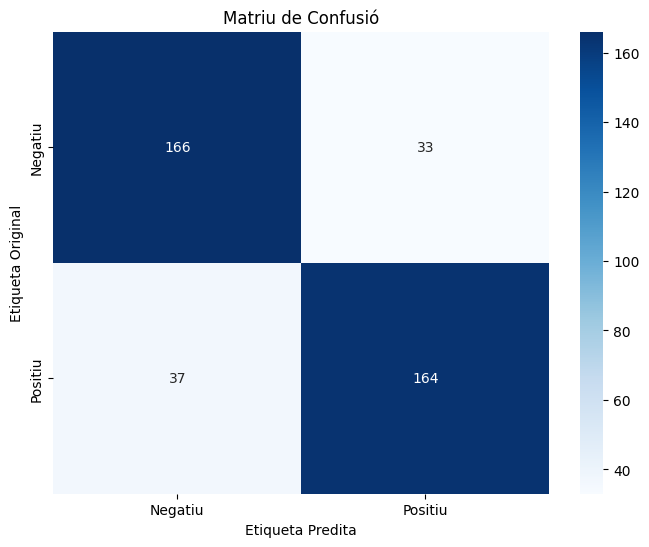

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Define las etiquetas de las clases
classes = ['Negatiu', 'Positiu']

# Crea la figura
plt.figure(figsize=(8, 6))

# Crea la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Añade etiquetas y título
plt.xlabel('Etiqueta Predita')
plt.ylabel('Etiqueta Original')
plt.title('Matriu de Confusió')


# Muestra la matriz de confusión
plt.show()


No supervisat

In [27]:
import nltk
nltk.download('sentiwordnet')


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


True

In [ ]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.corpus import sentiwordnet as swn
import numpy as np


from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.corpus import sentiwordnet as swn
import numpy as np

# Función para obtener la puntuación de polaridad de una palabra usando Lesk
def get_word_sentiment_score_with_lesk(word, context):
    # Obtener el synset con Lesk
    synset = lesk(context, word)
    if synset:
        # Obtener los sentimientos asociados al synset de SentiWordnet
        sent_synset = swn.senti_synset(synset.name())
        if sent_synset:
            return sent_synset.pos_score() - sent_synset.neg_score()
    return 0

# Obtener las opiniones de prueba
opinions_test = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# Umbral de polaridad
threshold = 0

# Procesar cada opinión
for opinion in opinions_test:
    # Tokenizar la opinión
    tokens = word_tokenize(opinion)
    total_sentiment_score = 0
    word_count = 0
    for i, token in enumerate(tokens):
        # Obtener el contexto de la palabra (palabras circundantes)
        context = tokens[max(0, i-5):i] + tokens[i+1:min(len(tokens), i+6)]
        # Calcular la puntuación de polaridad de la palabra
        sentiment_score = get_word_sentiment_score_with_lesk(token, context)
        total_sentiment_score += sentiment_score
        word_count += 1
    # Calcular la puntuación de polaridad promedio para la opinión
    if word_count > 0:
        average_sentiment_score = total_sentiment_score / word_count
        # Determinar si la opinión es positiva, negativa o neutra
        if average_sentiment_score > threshold:
            print("Opinión: Positiva")
        elif average_sentiment_score < threshold:
            print("Opinión: Negativa")
        else:
            print("Opinión: Neutra")


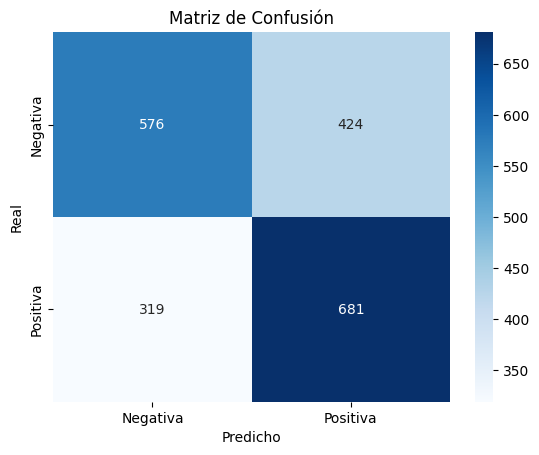

In [34]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.corpus import sentiwordnet as swn
import numpy as np

# Función para obtener la puntuación de polaridad de una palabra usando Lesk
def get_word_sentiment_score_with_lesk(word, context):
    # Obtener el synset con Lesk
    synset = lesk(context, word)
    if synset:
        # Obtener los sentimientos asociados al synset de SentiWordnet
        sent_synset = swn.senti_synset(synset.name())
        if sent_synset:
            return sent_synset.pos_score() - sent_synset.neg_score()
    return 0

# Obtener las opiniones de prueba
opinions_test = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]


# Umbral de polaridad
threshold = 0

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lista para almacenar las etiquetas reales y las predicciones
real_labels = []
predicted_labels = []

# Procesar cada opinión
for opinion in opinions_test:
    # Tokenizar la opinión
    tokens = word_tokenize(opinion)
    total_sentiment_score = 0
    word_count = 0
    for i, token in enumerate(tokens):
        # Obtener el contexto de la palabra (palabras circundantes)
        context = tokens[max(0, i-5):i] + tokens[i+1:min(len(tokens), i+6)]
        # Calcular la puntuación de polaridad de la palabra
        sentiment_score = get_word_sentiment_score_with_lesk(token, context)
        total_sentiment_score += sentiment_score
        word_count += 1
    # Calcular la puntuación de polaridad promedio para la opinión
    if word_count > 0:
        average_sentiment_score = total_sentiment_score / word_count
        # Determinar si la opinión es positiva, negativa o neutra
        if average_sentiment_score > threshold:
            predicted_labels.append("Positiva")
        elif average_sentiment_score <= threshold:
            predicted_labels.append("Negativa")

    # Determinar la etiqueta real de la opinión
    # Obtener las etiquetas reales de las opiniones de prueba
    real_labels = []
    for fileid in movie_reviews.fileids():
        if fileid.startswith('pos'):
            real_labels.append("Positiva")
        else:
            real_labels.append("Negativa")


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(real_labels, predicted_labels)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

